### 6.3 Geographic Visualization

#### This script contains the following:
    
1. Installation of folium, importof  data and libaries

2. Overview of the file and data frame

3. Data wrangling

4. Data cleaning 

5. Plotting a choropleth

### 1.Installation of folium, importof  data and libaries

In [54]:
# Install a pip package to install folium 
import sys
!{sys.executable} -m pip install folium

In [55]:
#import libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [56]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [57]:
# Import ".json" file for world countries 

country_geo = r'/Users/bente/careerfoundry /exercise_6/02 Data/original data/world-countries.json'

In [58]:
path = '/Users/bente/careerfoundry /exercise_6/02 Data/prepared data'

In [59]:
# Import the cleaned life expectancy data set 

df = pd.read_csv(os.path.join(path,'cleaned_data_22.02.24.csv'))

### 2. Overview of the file and data frame

In [60]:
# look at the JSON file contents

f = open(r'/Users/bente/careerfoundry /exercise_6/02 Data/original data/world-countries.json',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

the variable for country name appears to be under the key 'name' within the 'properties' dictionary.

In [61]:
#looking at the df 
df.head()

,country,year,continent,least_developed,life_expect,Population,CO2_emiss,Health expenditure(% of GDP),"""Electricity (kWh/capita)",forest_area,gdp_per_capita,Internet Users,military_spend,Open Defecation,Basic Drinking Water Users,adult_obesity,Per Capita Beer,Life Expectancy category
0,Albania,2000,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
1,Albania,2001,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2,Albania,2002,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
3,Albania,2003,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
4,Albania,2004,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


In [62]:
#checking the shape 
df.shape 

(2373, 18)

In [63]:
df.isnull().sum()

country                         0
year                            0
continent                       0
least_developed                 0
life_expect                     0
Population                      0
CO2_emiss                       0
Health expenditure(% of GDP)    0
"Electricity (kWh/capita)       0
forest_area                     0
gdp_per_capita                  0
Internet Users                  0
military_spend                  0
Open Defecation                 0
Basic Drinking Water Users      0
adult_obesity                   0
Per Capita Beer                 0
Life Expectancy category        0
dtype: int64

### 3. Data wrangling


Because the variable for country name in the json file is under the key 'name' within the 'properties' dictionary, 
I will rename the variable "Country" in the df with "name", so that they I can use them as a common key.

In [64]:
# renaming the column
df.rename(columns={'country': 'name'}, inplace=True)

In [65]:
#looking at the df 
df.head()

,name,year,continent,least_developed,life_expect,Population,CO2_emiss,Health expenditure(% of GDP),"""Electricity (kWh/capita)",forest_area,gdp_per_capita,Internet Users,military_spend,Open Defecation,Basic Drinking Water Users,adult_obesity,Per Capita Beer,Life Expectancy category
0,Albania,2000,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
1,Albania,2001,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2,Albania,2002,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
3,Albania,2003,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
4,Albania,2004,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


In [71]:
df.columns


Index(['name', 'year', 'continent', 'least_developed', 'life_expect',
       'Population', 'CO2_emiss', 'health_spend(% of GDP)',
       '"Electricity (kWh/capita)', 'forest_area', 'gdp_per_capita',
       'Internet Users', 'military_spend', 'Open Defecation',
       'Basic Drinking Water Users', 'adult_obesity', 'Per Capita Beer',
       'Life Expectancy category'],
      dtype='object')

In [74]:
# shortening names of columns in dataframe and fixing some spelling mistakes 
df.rename(columns={'Health expenditure(% of GDP)':'health_spend(% of GDP)','Population':'population','"Electricity (kWh/capita)':'electr_consum(kWh/capita)','Open Defecation':'open_defecation','Internet Users':'internet_users','Basic Drinking Water Users':'drinking_water_user', 'Per Capita Beer':'beer_per_capita', 'Life Expectancy category':'life_exp_category' }, inplace=True)


In [75]:
#looking at the df 
df.head()

,name,year,continent,least_developed,life_expect,population,CO2_emiss,health_spend(% of GDP),electr_consum(kWh/capita),forest_area,gdp_per_capita,internet_users,military_spend,open_defecation,drinking_water_user,adult_obesity,beer_per_capita,life_exp_category
0,Albania,2000,Europe,0,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,Middle Life Expectancy
1,Albania,2001,Europe,0,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,Middle Life Expectancy
2,Albania,2002,Europe,0,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,Middle Life Expectancy
3,Albania,2003,Europe,0,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,Middle Life Expectancy
4,Albania,2004,Europe,0,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,High Life Expectancy


### 4. Data Cleaning 

In [68]:
#checking for duplicates 
dups = df.duplicated()
dups.shape # no duplicates 

(2373,)

#### Extreme value check

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='life_expect', ylabel='Count'>

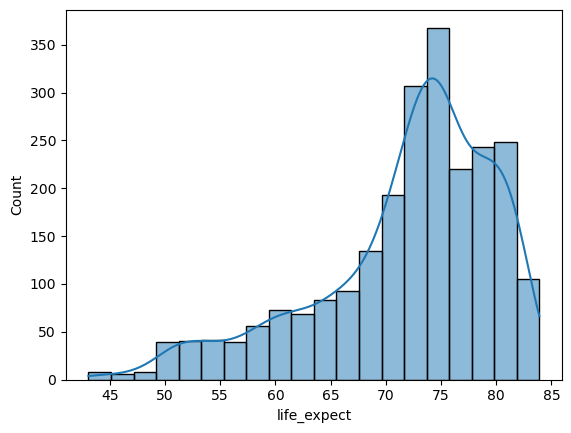

In [76]:
#Extreme value check life_expect
sns.histplot(df['life_expect'], bins=20, kde = True) # shows extreme values for 'life_expect'



/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='population', ylabel='Count'>

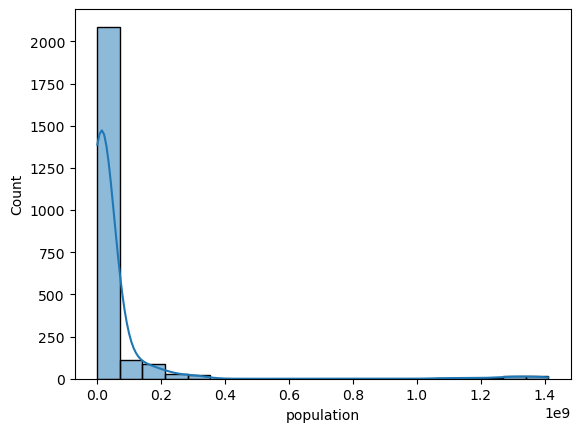

In [103]:
#Extreme value check population
sns.histplot(df['population'], bins=20, kde = True) 


/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='CO2_emiss', ylabel='Count'>

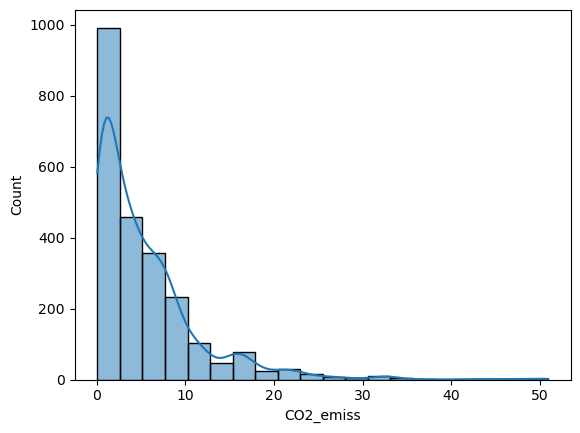

In [78]:
#Extreme value check CO2_emiss
sns.histplot(df['CO2_emiss'], bins=20, kde = True) # shows extreme values for 'CO2_emiss'


/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='health_spend(% of GDP)', ylabel='Count'>

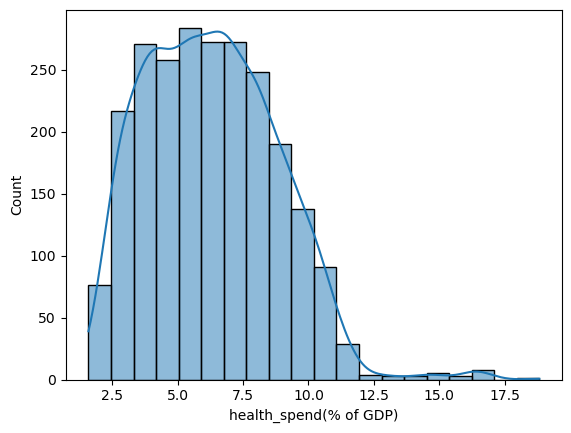

In [80]:
#Extreme value check health_spend(% of GDP)
sns.histplot(df['health_spend(% of GDP)'], bins=20, kde = True) # shows extreme values for 'health_spend(% of GDP)'


/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='electr_consum(kWh/capita)', ylabel='Count'>

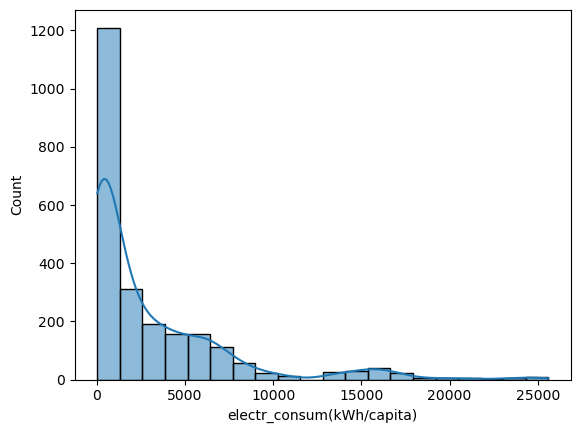

In [82]:
#Extreme value check electr_consum(kWh/capita)
sns.histplot(df['electr_consum(kWh/capita)'], bins=20, kde = True) # shows extreme values for 'electr_consum(kWh/capita)'


/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='forest_area', ylabel='Count'>

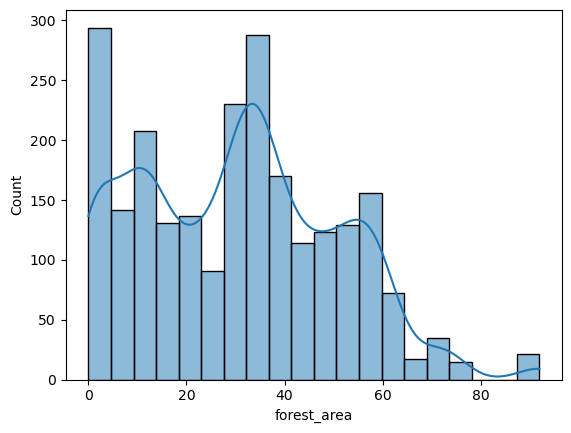

In [83]:
#Extreme value check forest_area
sns.histplot(df['forest_area'], bins=20, kde = True) # shows extreme values for 'forest_area'


/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='gdp_per_capita', ylabel='Count'>

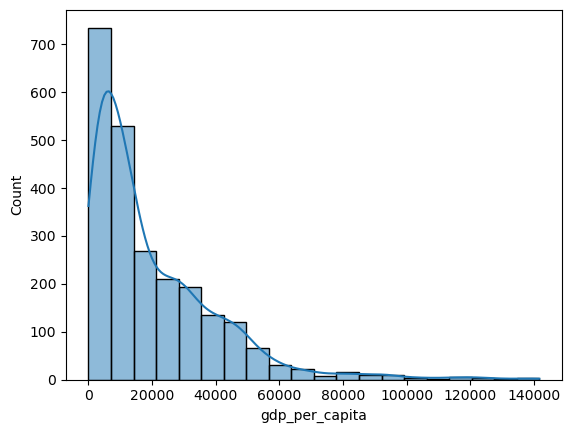

In [84]:
#Extreme value check gdp_per_capita
sns.histplot(df['gdp_per_capita'], bins=20, kde = True) # shows extreme values for 'gdp_per_capita'


/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='internet_users', ylabel='Count'>

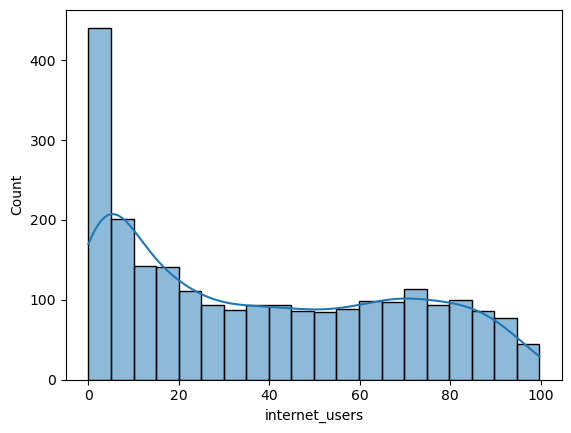

In [85]:
#Extreme value check internet_users
sns.histplot(df['internet_users'], bins=20, kde = True) 


/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='military_spend', ylabel='Count'>

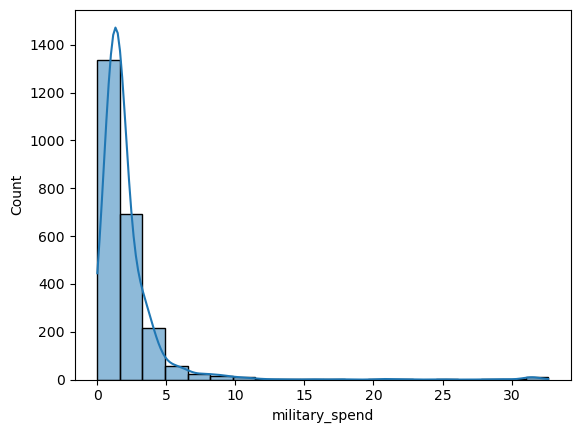

In [86]:
#Extreme value check military_spend
sns.histplot(df['military_spend'], bins=20, kde = True)

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='open_defecation', ylabel='Count'>

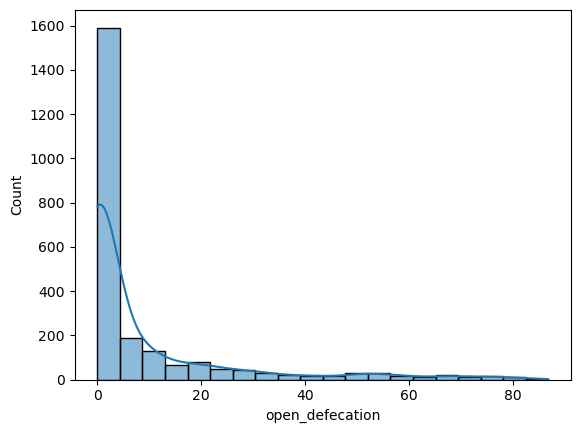

In [87]:
#Extreme value check open_defecation
sns.histplot(df['open_defecation'], bins=20, kde = True)

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='drinking_water_user', ylabel='Count'>

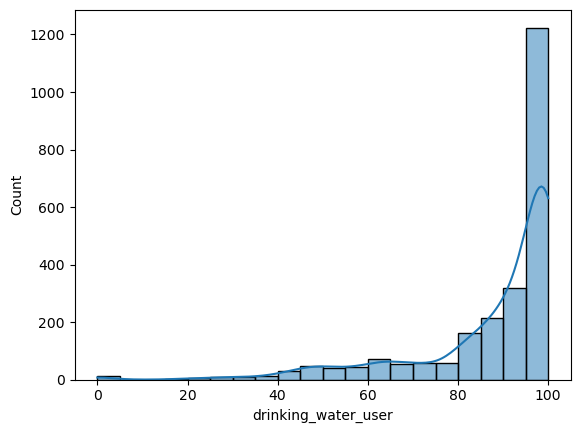

In [88]:
#Extreme value check drinking_water_user
sns.histplot(df['drinking_water_user'], bins=20, kde = True)

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='adult_obesity', ylabel='Count'>

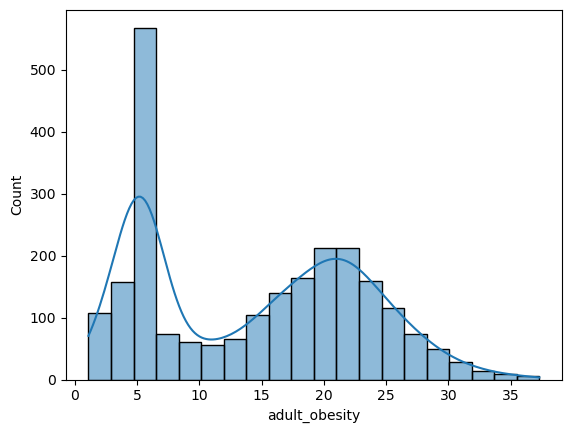

In [89]:
#Extreme value check adult_obesity
sns.histplot(df['adult_obesity'], bins=20, kde = True)

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/bente/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='beer_per_capita', ylabel='Count'>

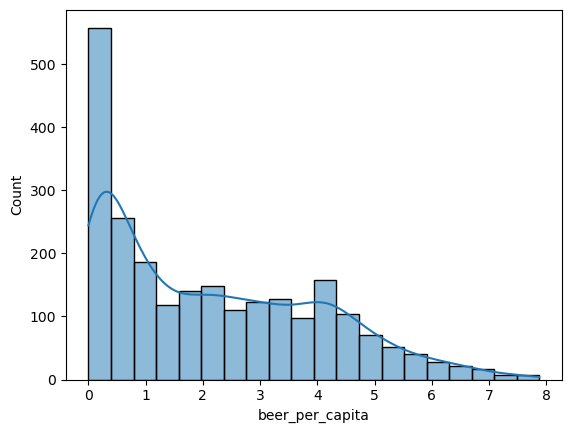

In [90]:
#Extreme value check beer_per_capita
sns.histplot(df['beer_per_capita'], bins=20, kde = True)

### 5. Plotting a choropleth

In [91]:
df.columns

Index(['name', 'year', 'continent', 'least_developed', 'life_expect',
       'population', 'CO2_emiss', 'health_spend(% of GDP)',
       'electr_consum(kWh/capita)', 'forest_area', 'gdp_per_capita',
       'internet_users', 'military_spend', 'open_defecation',
       'drinking_water_user', 'adult_obesity', 'beer_per_capita',
       'life_exp_category'],
      dtype='object')

In [93]:
df['name'].replace({"Turkiye":"Turkey"},inplace = True)
df['name'].replace({"Russian Federation":"Russia"},inplace = True)

In [95]:
#aggregate the df so that the average of the years is displayed rather then the last observation
df_aggregated=df.groupby(['name'])['life_expect'].mean()

In [104]:
df_aggregated

name
Albania           76.600048
Algeria           74.248095
Angola            54.990190
Argentina         75.283048
Armenia           73.341333
                    ...    
Ukraine           69.775679
United Kingdom    79.972242
United States     78.009988
Uruguay           76.575000
Zimbabwe          51.604286
Name: life_expect, Length: 113, dtype: float64

#### life_expect map

In [96]:
# Reset the index of df_aggregated
df_aggregated_reset = df_aggregated.reset_index()

# Create a data frame with just the countries and the values we want plotted
data_to_plot = df_aggregated_reset[['name','life_expect']]
data_to_plot.head()

,name,life_expect
0,Albania,76.600048
1,Algeria,74.248095
2,Angola,54.990190
3,Argentina,75.283048
4,Armenia,73.341333


In [97]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['name', 'life_expect'],
    key_on = 'feature.properties.name', # this part is very important - check json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)


map

In [98]:
#save the map 
map.save('life_expectancy_fixed_13.03.html')

In [100]:
#  finding the location of the HTML file
file_path = os.path.abspath('life_expectancy_fixed_13.03.html')

print("Die Karte wurde unter folgendem Pfad gespeichert:")
print(file_path)

Die Karte wurde unter folgendem Pfad gespeichert:
/Users/bente/careerfoundry /exercise_6/03 Scripts/life_expectancy_fixed_13.03.html


Do countries which are geographically close to each other have similar life expectancies? 

->In most cases, neighboring countries do not have an extreme differences in life expectancy. The neighboring 
countries are somewhat lighter or darker, but not to the extent of significant difference.
An exception is Thailand and Myanmar and cambodia. Thailand is shaded very dark, while Myanmar and cambodia are light-colored. Same for Algerie and Niger. 

### bonus: choropleth based on life expectancy category

In [105]:
df_category=df.groupby(['name'])['life_expect'].mean()

df_category=pd.DataFrame({'name':df_category.index, 'life_expect':df_category.values})

df_category.loc[df_category['life_expect'] < 45, 'life_exp_category2'] = 'Very Low Life Expectancy'
df_category.loc[(df_category['life_expect'] >= 45) & (df_category['life_expect'] < 60), 'life_exp_category2'] = 'Low Life Expectancy'
df_category.loc[(df_category['life_expect'] >= 60) & (df_category['life_expect'] < 75), 'life_exp_category2'] = 'Middle Life Expectancy'
df_category.loc[(df_category['life_expect'] >= 75) & (df_category['life_expect'] <= 85), 'life_exp_category2']= 'High Life Expectancy'


import plotly.express as px
fig = px.choropleth(df_category,
                    locations='name',
                    locationmode='country names',
                    color='life_exp_category2',
                    color_discrete_map={'Very Low Life Expectancy': 'lightgrey',
                                        'Low Life Expectancy': 'orange',
                                        'Middle Life Expectancy': 'yellow',
                                        'High Life Expectancy': 'red'},
                    title='Life Expectancy Category by Country')

fig.update_geos(visible=False, resolution=110)
fig.show()

/var/folders/3b/250d_ncn2cb7rf34jj9d3gl40000gq/T/ipykernel_61294/2962748388.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Very Low Life Expectancy' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [ ]:
#export as pickle
path = '/Users/bente/careerfoundry /exercise_6/02 Data/prepared data'
df.to_pickle(os.path.join(path, 'LAST_CLEANED_12.03.pkl'))

## export as csv
df.to_csv(os.path.join(path, 'LAST_CLEANED_12.03.csv'), index=False)

In [ ]:
df.to_csv('LAST_CLEANED.txt', sep='\t', index=False)  

In [ ]:
# Get the current working directory
current_directory = os.getcwd()

In [ ]:
current_directory